In [4]:
import os
import random
import pandas as pd
import numpy as np
import imageio.v2 as imageio

from graphviz import Digraph
from IPython.display import Image as ImageDisplay
from PIL import ImageDraw
from PIL import Image
from PIL import ImageFont
from typing import List, Any

In [347]:
mc_example = {'NYC': [.25,0,.75,1],
              'Paris': [.25,.25,0,0],
              'Cairo': [.25,.25,.25,0],
              'Seoul': [.25,.5,0,0]}

mc = pd.DataFrame(data = mc_example, index = ['NYC', 'Paris', 'Cairo', 'Seoul'])
mc

,NYC,Paris,Cairo,Seoul
NYC,0.25,0.25,0.25,0.25
Paris,0.00,0.25,0.25,0.50
Cairo,0.75,0.00,0.25,0.00
Seoul,1.00,0.00,0.00,0.00


In [348]:
mc.iloc[0].index

Index(['NYC', 'Paris', 'Cairo', 'Seoul'], dtype='object')

In [349]:
mc.iloc[0]

NYC      0.25
Paris    0.25
Cairo    0.25
Seoul    0.25
Name: NYC, dtype: float64

In [350]:
np.random.choice(mc.iloc[0].index, p=mc.iloc[0])

'Seoul'

In [139]:
mc.index.get_loc('Paris')

1

In [140]:
mc.iloc[mc.index.get_loc('Paris')].index

Index(['NYC', 'Paris', 'Cairo', 'Seoul'], dtype='object')

In [141]:
mc.iloc[mc.index.get_loc('Paris')]

NYC      0.00
Paris    0.25
Cairo    0.25
Seoul    0.50
Name: Paris, dtype: float64

In [352]:
travel_sim = []

# get row 0th, then get index of item 0th -> NYC
city = mc.iloc[0].index[0]

# append into travel_sim
travel_sim.append(city)

# get the next visited city randomly choice based on known probability
travel_sim.append(np.random.choice(mc.iloc[0].index, # get index of row 0th
                                   p=mc.iloc[0] # get probability of row 0th
                                   ))
print('first print', travel_sim)

# get the next city using previous city probability
while len(travel_sim)<25:
    city = np.random.choice(mc.iloc[mc.index.get_loc(city)].index,
                            p = mc.iloc[mc.index.get_loc(city)]
                            )
    travel_sim.append(city)
travel_sim


first print ['NYC', 'Seoul']


['NYC',
 'Seoul',
 'Cairo',
 'NYC',
 'Cairo',
 'NYC',
 'NYC',
 'Cairo',
 'NYC',
 'Cairo',
 'NYC',
 'Seoul',
 'NYC',
 'Seoul',
 'NYC',
 'NYC',
 'Cairo',
 'NYC',
 'Paris',
 'Paris',
 'Cairo',
 'NYC',
 'NYC',
 'NYC',
 'NYC']

In [143]:
def matrix_power(matrix, power):
  if power == 0:
    return np.identity(len(matrix))
  elif power == 1:
    return matrix
  else:
    return np.dot(matrix, matrix_power(matrix, power-1))
     

In [144]:
matrix_power(mc.to_numpy(), 2)

array([[0.5   , 0.125 , 0.1875, 0.1875],
       [0.6875, 0.0625, 0.125 , 0.125 ],
       [0.375 , 0.1875, 0.25  , 0.1875],
       [0.25  , 0.25  , 0.25  , 0.25  ]])

In [145]:
initial_dist = np.asarray([0,0,0,1])

mc_p2 = matrix_power(mc.to_numpy(),2)
print(mc_p2)
np.dot(initial_dist,mc_p2)

[[0.5    0.125  0.1875 0.1875]
 [0.6875 0.0625 0.125  0.125 ]
 [0.375  0.1875 0.25   0.1875]
 [0.25   0.25   0.25   0.25  ]]


array([0.25, 0.25, 0.25, 0.25])

In [1]:
from markovchain import MarkovChain

BASELINE MATRIX 
           Ttukseom  Gunja  Wangsimni  Dapsimni
Ttukseom       0.23   0.41       0.12      0.24
Gunja          0.32   0.06       0.45      0.17
Wangsimni      0.09   0.06       0.41      0.44
Dapsimni       0.37   0.49       0.08      0.06


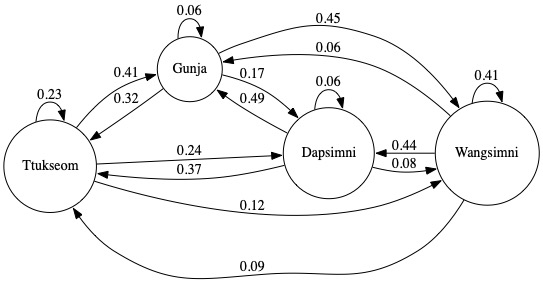

In [16]:
mc = MarkovChain(region_list=['Ttukseom', 'Gunja', 'Wangsimni', 'Dapsimni'],
                 remove_self_flight=False)

base_img = mc.plot_base()
ImageDisplay(base_img)


 BLOCKED MATRIX BETWEEN Wangsimni AND Dapsimni
           Ttukseom  Gunja  Wangsimni  Dapsimni
Ttukseom       0.35   0.17       0.08      0.40
Gunja          0.32   0.37       0.14      0.17
Wangsimni      0.40   0.10       0.50      0.00
Dapsimni       0.22   0.33       0.00      0.45


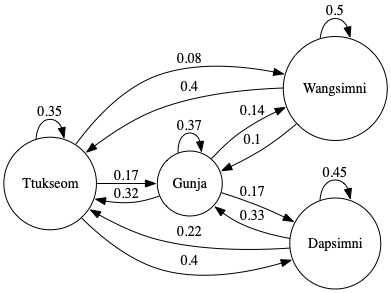

In [17]:
blocked_img = mc.plot_blocked_node(node_1= 'Wangsimni', node_2='Dapsimni')
ImageDisplay(blocked_img)

Step: 8
['Wangsimni', 'Wangsimni', 'Gunja', 'Wangsimni', 'Ttukseom', 'Ttukseom', 'Ttukseom', 'Ttukseom', 'Dapsimni']


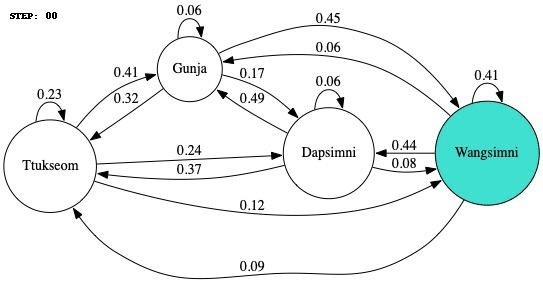

In [19]:
travel_simulated = mc.travel_simulation(mc.blocked_df,
                                        init_region='Wangsimni',
                                        dest_region='Dapsimni'
                                        )
print(f'Step: {len(travel_simulated)-1}')
print(travel_simulated)

travel_img = mc.plot_travel_simulation(selected_df=mc.base_df)
ImageDisplay(travel_img)

# Calculate n-step probability matrix

The UAV is starting the trip from Wangsimni.
What the probability of ending in Gunja is two trips from now?

In [20]:
mc.prob_ending_region_after_n_step(matrix_df=mc.blocked_df,
                                    init_region='Wangsimni',
                                    final_region='Dapsimni',
                                    n_step=2)

0.17700000000000005